In [199]:
# eda
import pandas as pd
import numpy as np
# data viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# geopandas
import geopandas as gpd
from shapely.geometry import Polygon
import point
import descartes


In [200]:
#load dataset
df = pd.read_csv(r'C:\Users\Keshav Pathak\Desktop\coronavirus_dataset.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [201]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [202]:
df.rename(columns={'Province/State':'Province State','Country/Region':'Country Region'},inplace = True)

In [203]:
df.columns

Index(['Province State', 'Country Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [204]:
#shape
df.shape

(18576, 8)

In [205]:
#datatypes
df.dtypes

Province State     object
Country Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [206]:
df.head(10)

,Province State,Country Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0.0,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0.0,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0.0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0.0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0.0,0


In [207]:
df = df[['Province State', 'Country Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths']]

In [208]:
#missing values
df.isna().sum()

Province State    12816
Country Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Recovered          1008
Deaths                0
dtype: int64

In [209]:
df.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,18576.000000,18576.000000,18576.000000,17568.000000,18576.000000
mean,21.650595,22.847768,675.610304,198.723076,28.735411
std,24.446770,70.939330,6202.699140,2487.891933,363.769841
min,-41.454500,-135.000000,0.000000,0.000000,0.000000
25%,7.540000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,0.000000,0.000000,0.000000
75%,41.204400,84.250000,42.000000,2.000000,0.000000
max,71.706900,178.065000,243453.000000,63471.000000,13915.000000


In [210]:
#no of case per day
df.groupby('Date')['Confirmed', 'Deaths','Recovered'].sum()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17,28.0
1/23/20,654,18,30.0
1/24/20,941,26,38.0
1/25/20,1434,42,83.0
1/26/20,2118,56,63.0
...,...,...,...
3/7/20,105847,3558,64409.0
3/8/20,109821,3802,66824.0
3/9/20,113590,3988,68337.0


In [211]:
df_per_day = df.groupby('Date')['Confirmed', 'Deaths','Recovered'].max()

In [212]:
df_per_day.head(10)

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28.0
1/23/20,444,17,28.0
1/24/20,549,24,31.0
1/25/20,761,40,42.0
1/26/20,1058,52,45.0
1/27/20,1423,76,80.0
1/28/20,3554,125,88.0
1/29/20,3554,125,90.0
1/30/20,4903,162,141.0


In [213]:
#max number of cases per day
df_per_day['Confirmed'].max()

243453

In [214]:
#min number of cases per day
df_per_day['Confirmed'].min()

444

In [215]:
#date of max niumber of cases
df_per_day['Confirmed'].idxmax()

'4/2/20'

In [216]:
#number of cases per country
df.groupby('Country Region')['Confirmed','Deaths','Recovered'].max()

,Confirmed,Deaths,Recovered
Country Region,,,
Afghanistan,273,6,3900.0
Albania,277,16,58946.0
Algeria,986,86,1014.0
Andorra,428,15,3459.0
Angola,8,2,3547.0
...,...,...,...
Venezuela,146,5,424.0
Vietnam,233,0,752.0
West Bank and Gaza,161,1,404.0


In [217]:
#statewise cases per country
df.groupby(['Country Region','Province State'])['Confirmed','Deaths','Recovered'].max()

Confirmed  Deaths  Recovered
Country Region Province State                                            
Australia      Australian Capital Territory         87       1      403.0
               New South Wales                    2298      10    33934.0
               Northern Territory                   21       0      887.0
               Queensland                          835       4      359.0
               South Australia                     367       0     1823.0
...                                                ...     ...        ...
United Kingdom Channel Islands                     193       3     6639.0
               Gibraltar                            88       0     8481.0
               Isle of Man                          95       1    12391.0
               Montserrat                            5       0     1221.0
               Turks and Caicos Islands              6       0    22647.0

[80 rows x 3 columns]

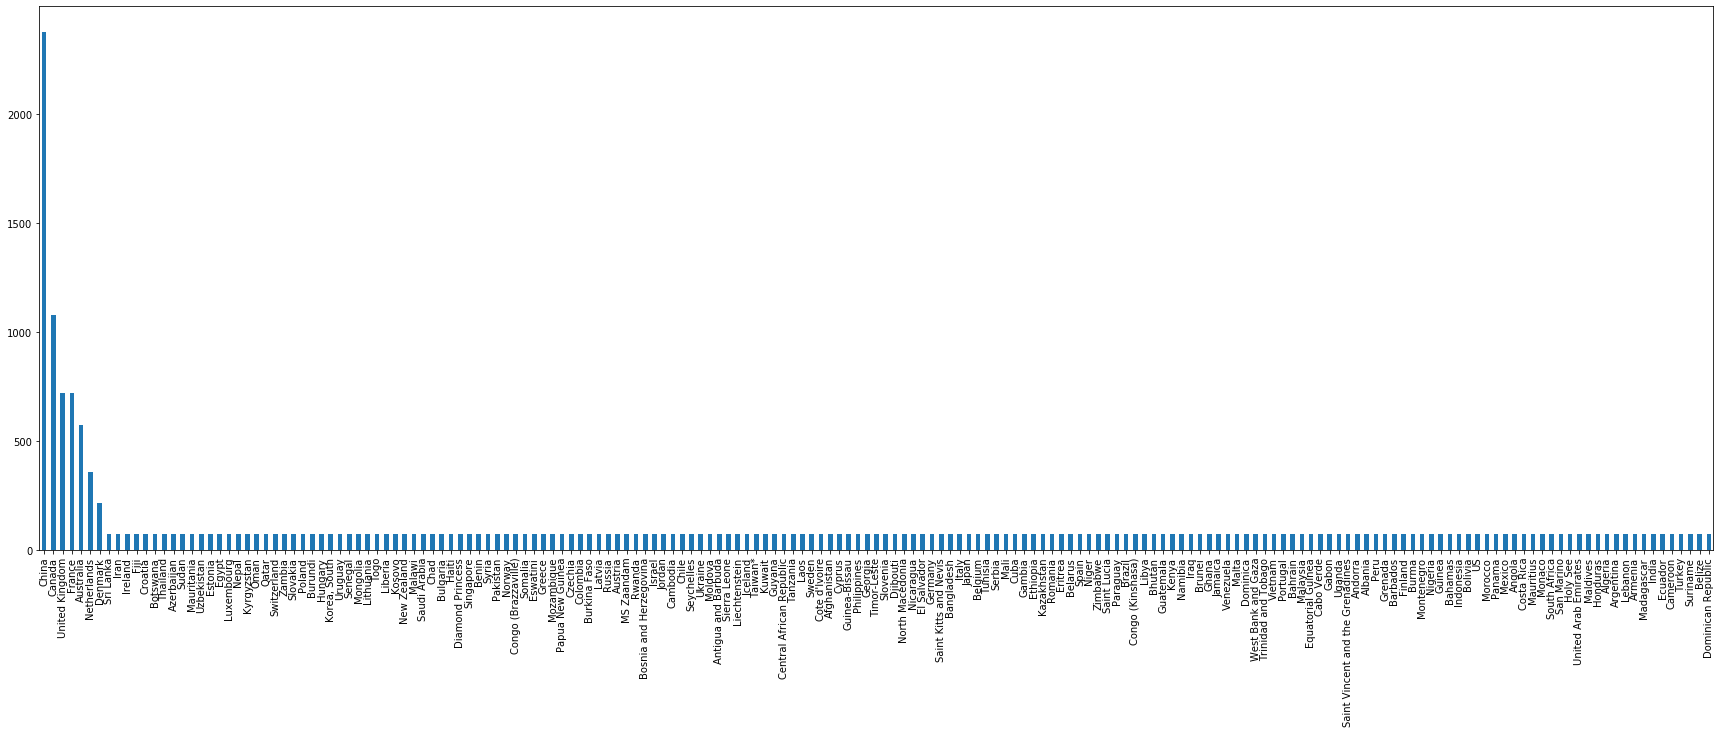

In [218]:
#plot for countries
df['Country Region'].value_counts().plot(kind = 'bar', figsize = (30,10))

In [219]:
#how much countries are affected
df['Country Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

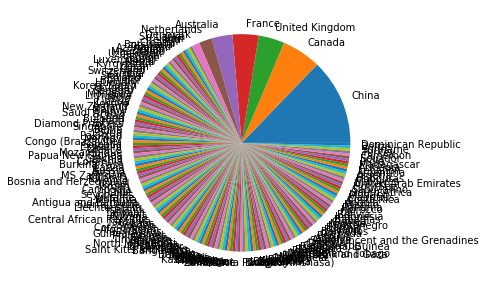

In [366]:
#distribution on map
plt.figure(figsize = (40,5))
df['Country Region'].value_counts().plot.pie()

# check for map

lat/longitute
geometry/point

In [239]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [301]:
# convert data to geodataframe
gdf1 = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['Long'],df['Lat']))
gdf1.head()

,Province State,Country Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [302]:
type(gdf1)

geopandas.geodataframe.GeoDataFrame

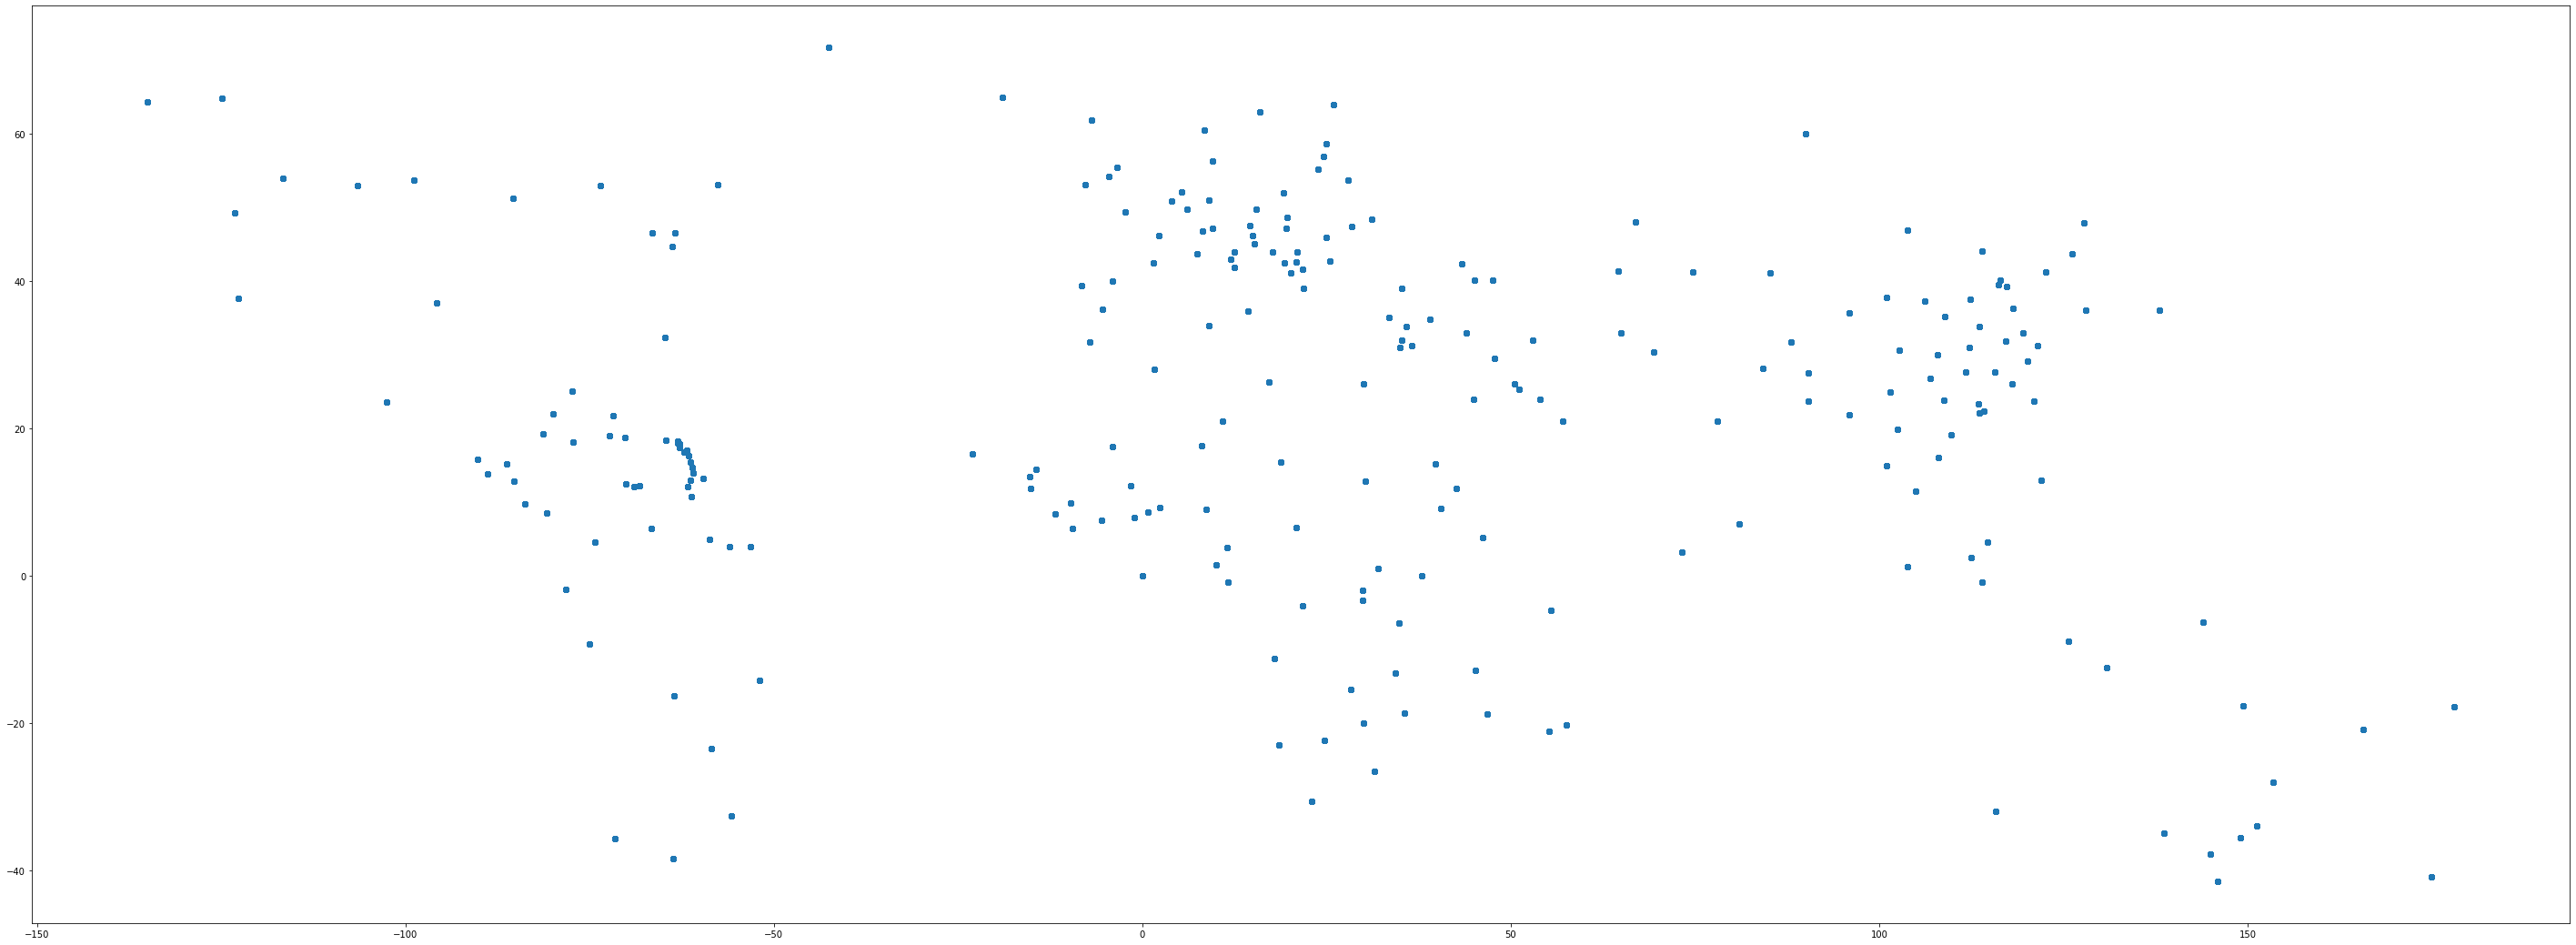

In [310]:
gdf1.plot(figsize=(50,300))

(-198.0, 198.00000000000006, -98.68225649999998, 92.3273865)

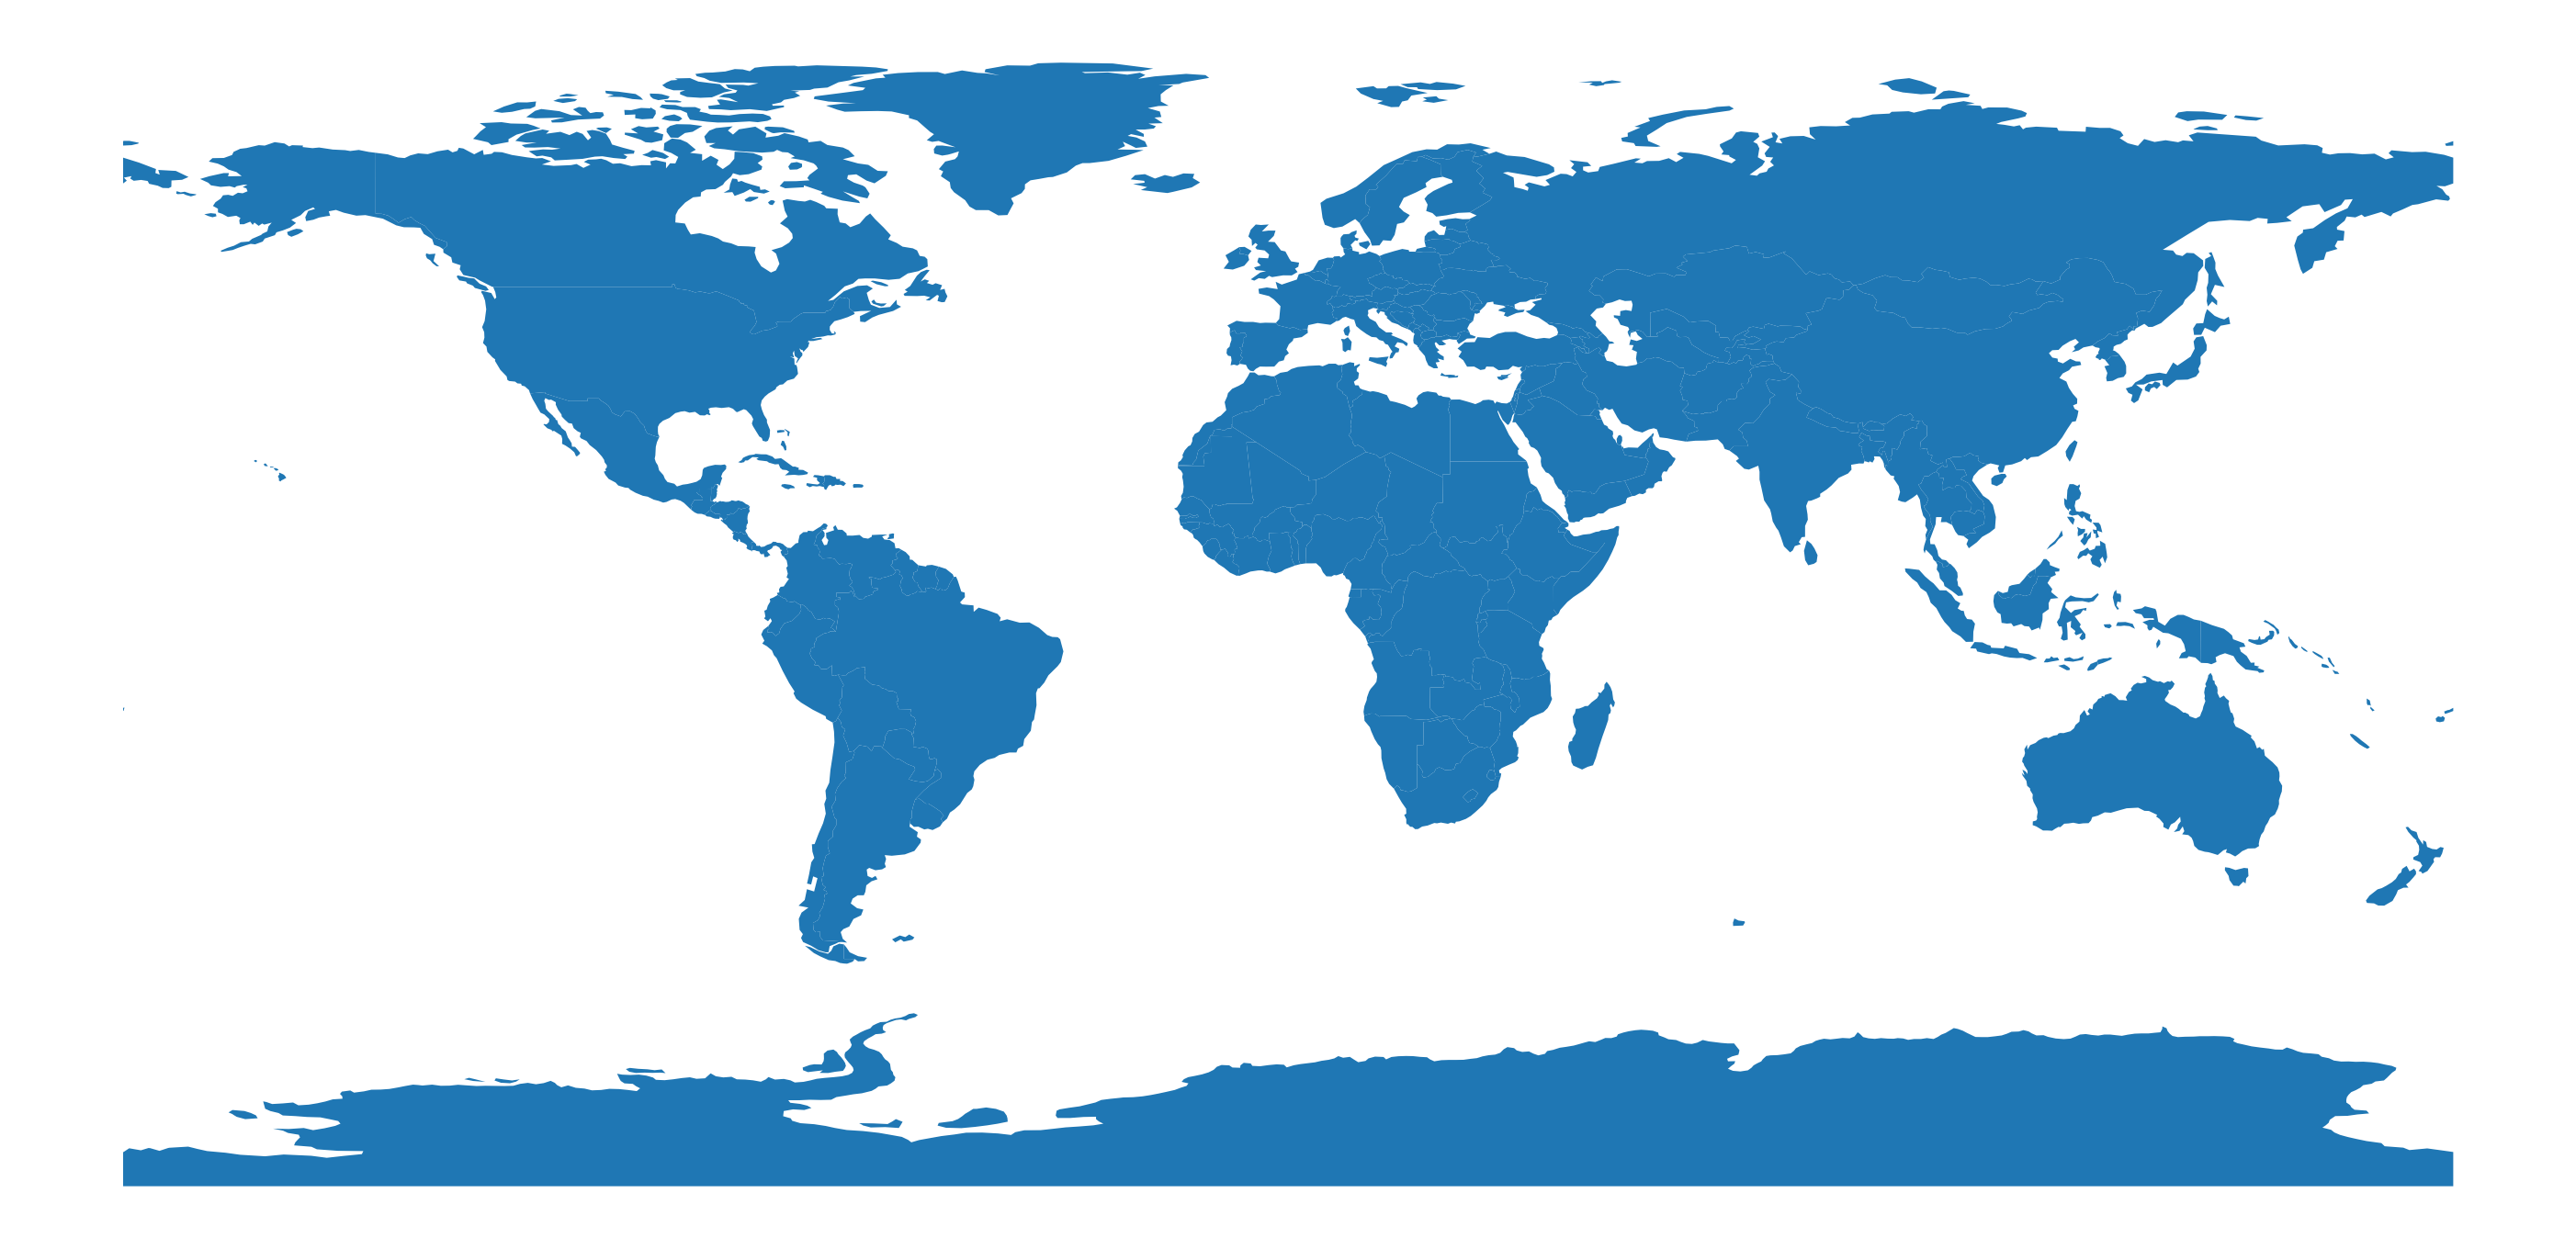

In [305]:
#overlapping wirh world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(50,300))
ax.axis('off')

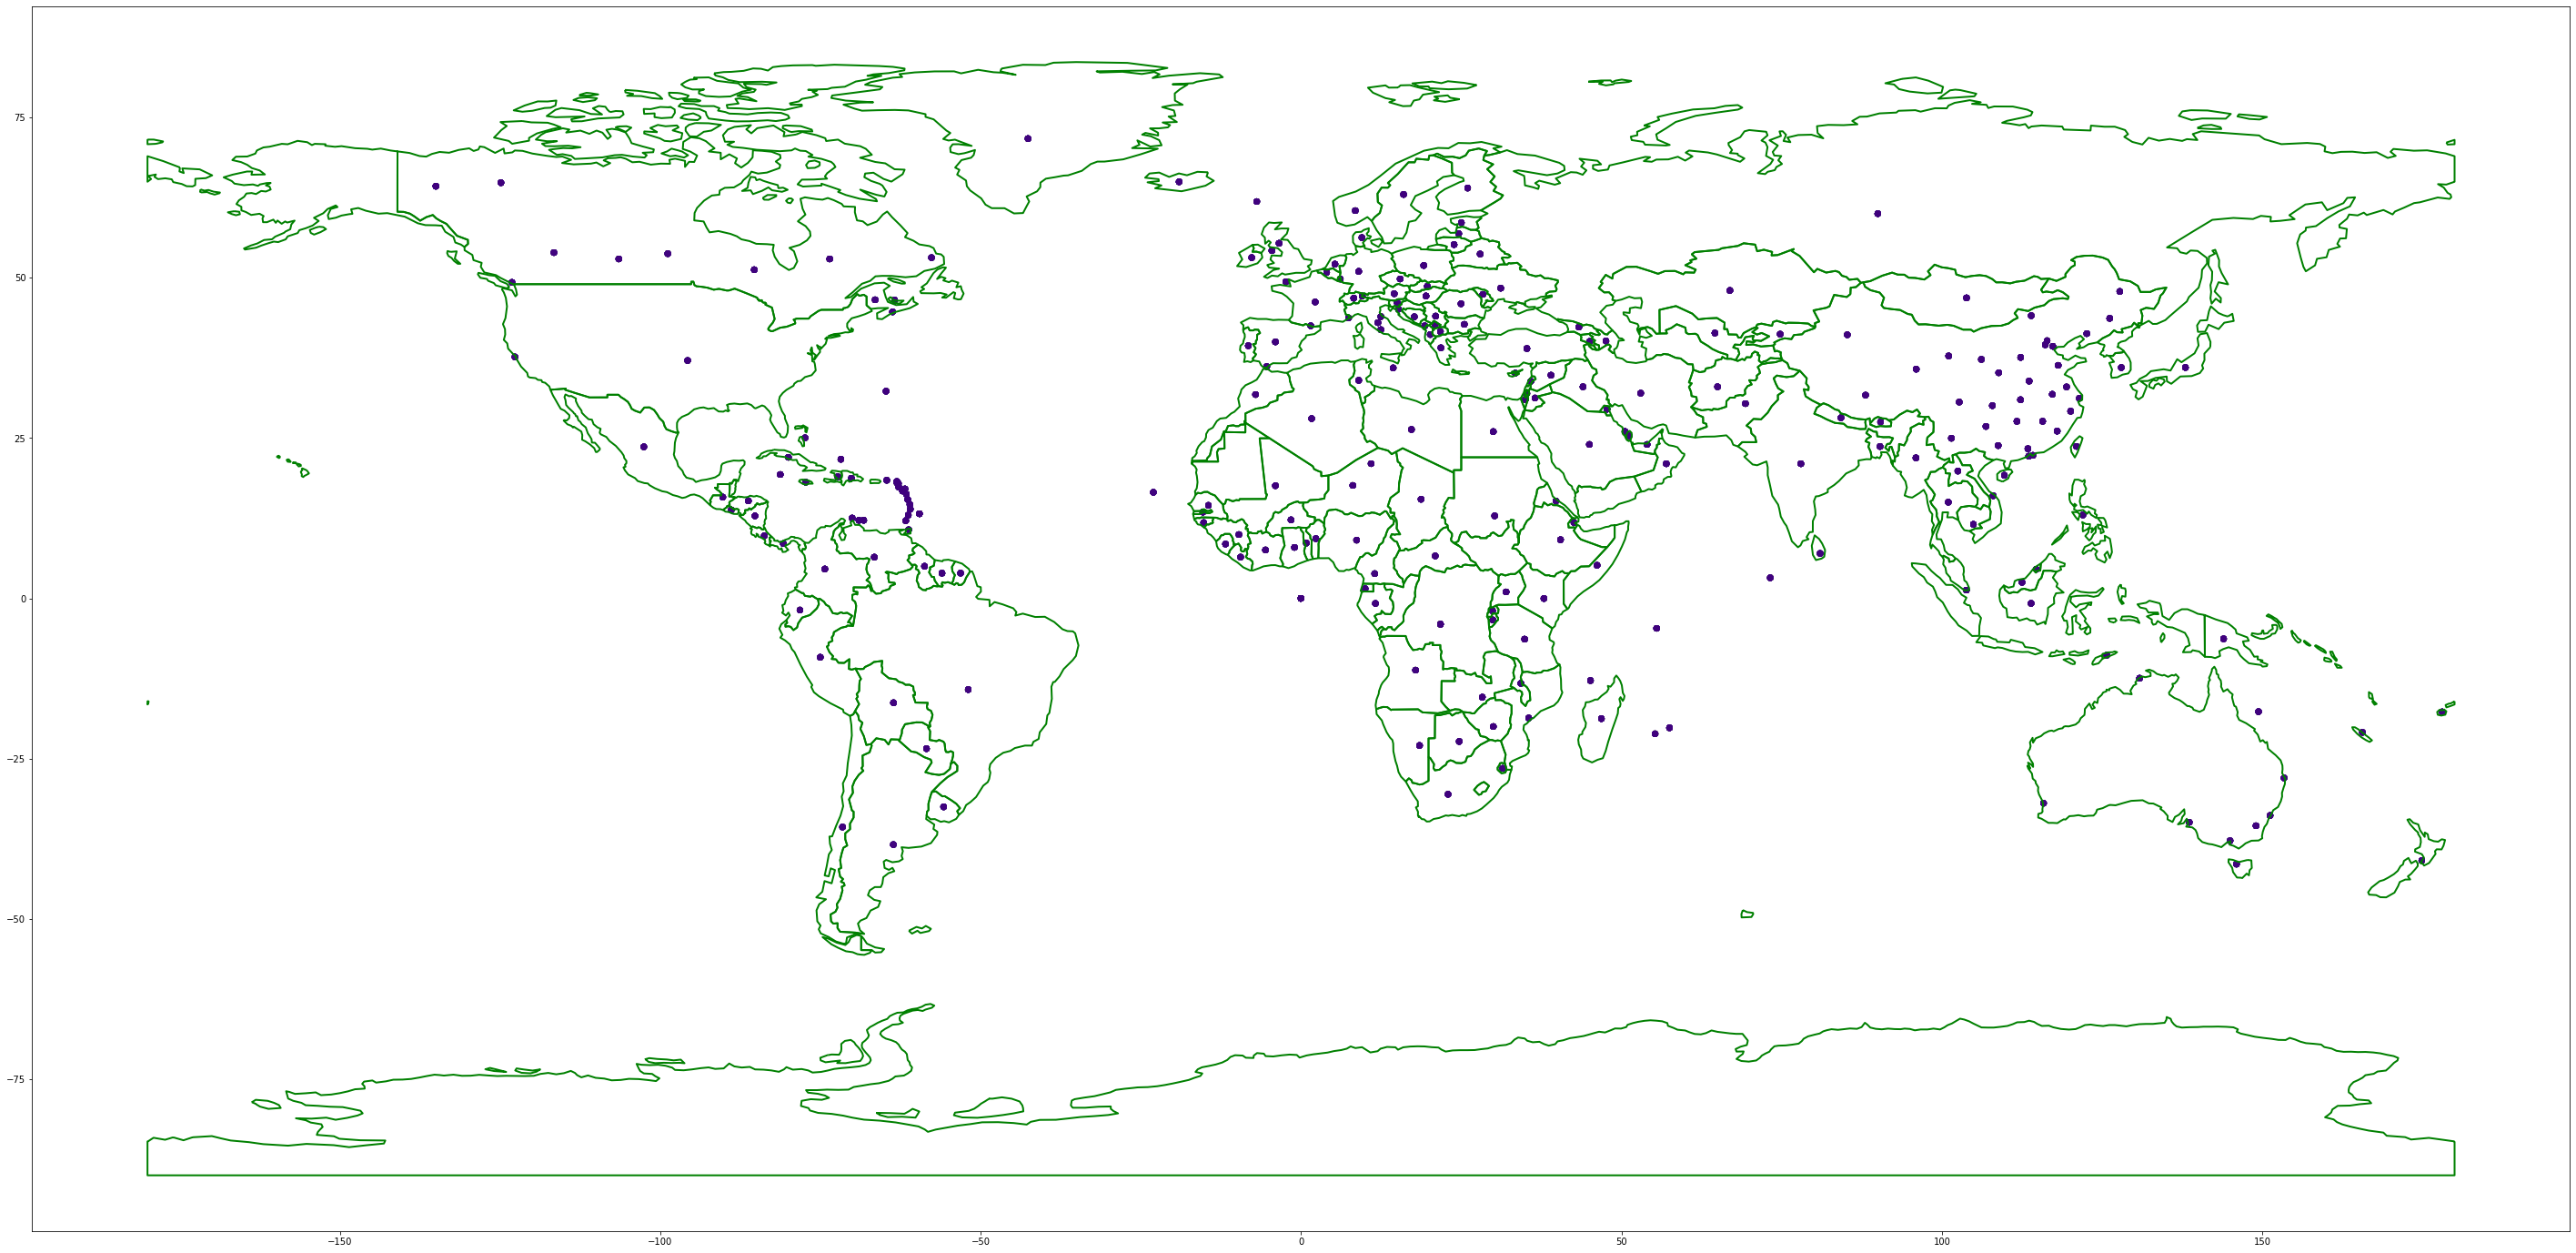

In [311]:
#overlap
fig,ax  = plt.subplots(figsize = (50,300))
gdf1.plot(cmap = 'Purples' , ax = ax)
world.geometry.boundary.plot(color = 'green',edgecolor = 'K',linewidth = 2 , ax =ax)

In [312]:
#per country
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [246]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [272]:
asia = world[world['continent'] == 'Asia']
asia


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [293]:
africa = world[world['continent'] == 'Africa']
north_america = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']
asia = world[world['continent'] == 'Asia']



In [294]:
#in china
df.head(10)

,Province State,Country Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0,0.0,0,POINT (-61.79640 17.06080)
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0,0.0,0,POINT (-63.61670 -38.41610)
7,NaN,Armenia,40.0691,45.0382,1/22/20,0,0.0,0,POINT (45.03820 40.06910)
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0.0,0,POINT (149.01240 -35.47350)
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0.0,0,POINT (151.20930 -33.86880)


In [313]:
gdf1[gdf1['Country Region'] == 'India']

,Province State,Country Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
131,NaN,India,21.0,78.0,1/22/20,0,0.0,0,POINT (78.00000 21.00000)
389,NaN,India,21.0,78.0,1/23/20,0,0.0,0,POINT (78.00000 21.00000)
647,NaN,India,21.0,78.0,1/24/20,0,0.0,0,POINT (78.00000 21.00000)
905,NaN,India,21.0,78.0,1/25/20,0,0.0,0,POINT (78.00000 21.00000)
1163,NaN,India,21.0,78.0,1/26/20,0,0.0,0,POINT (78.00000 21.00000)
...,...,...,...,...,...,...,...,...,...
17417,NaN,India,21.0,78.0,3/29/20,1024,0.0,27,POINT (78.00000 21.00000)
17675,NaN,India,21.0,78.0,3/30/20,1251,NaN,32,POINT (78.00000 21.00000)
17933,NaN,India,21.0,78.0,3/31/20,1397,NaN,35,POINT (78.00000 21.00000)
18191,NaN,India,21.0,78.0,4/1/20,1998,NaN,58,POINT (78.00000 21.00000)


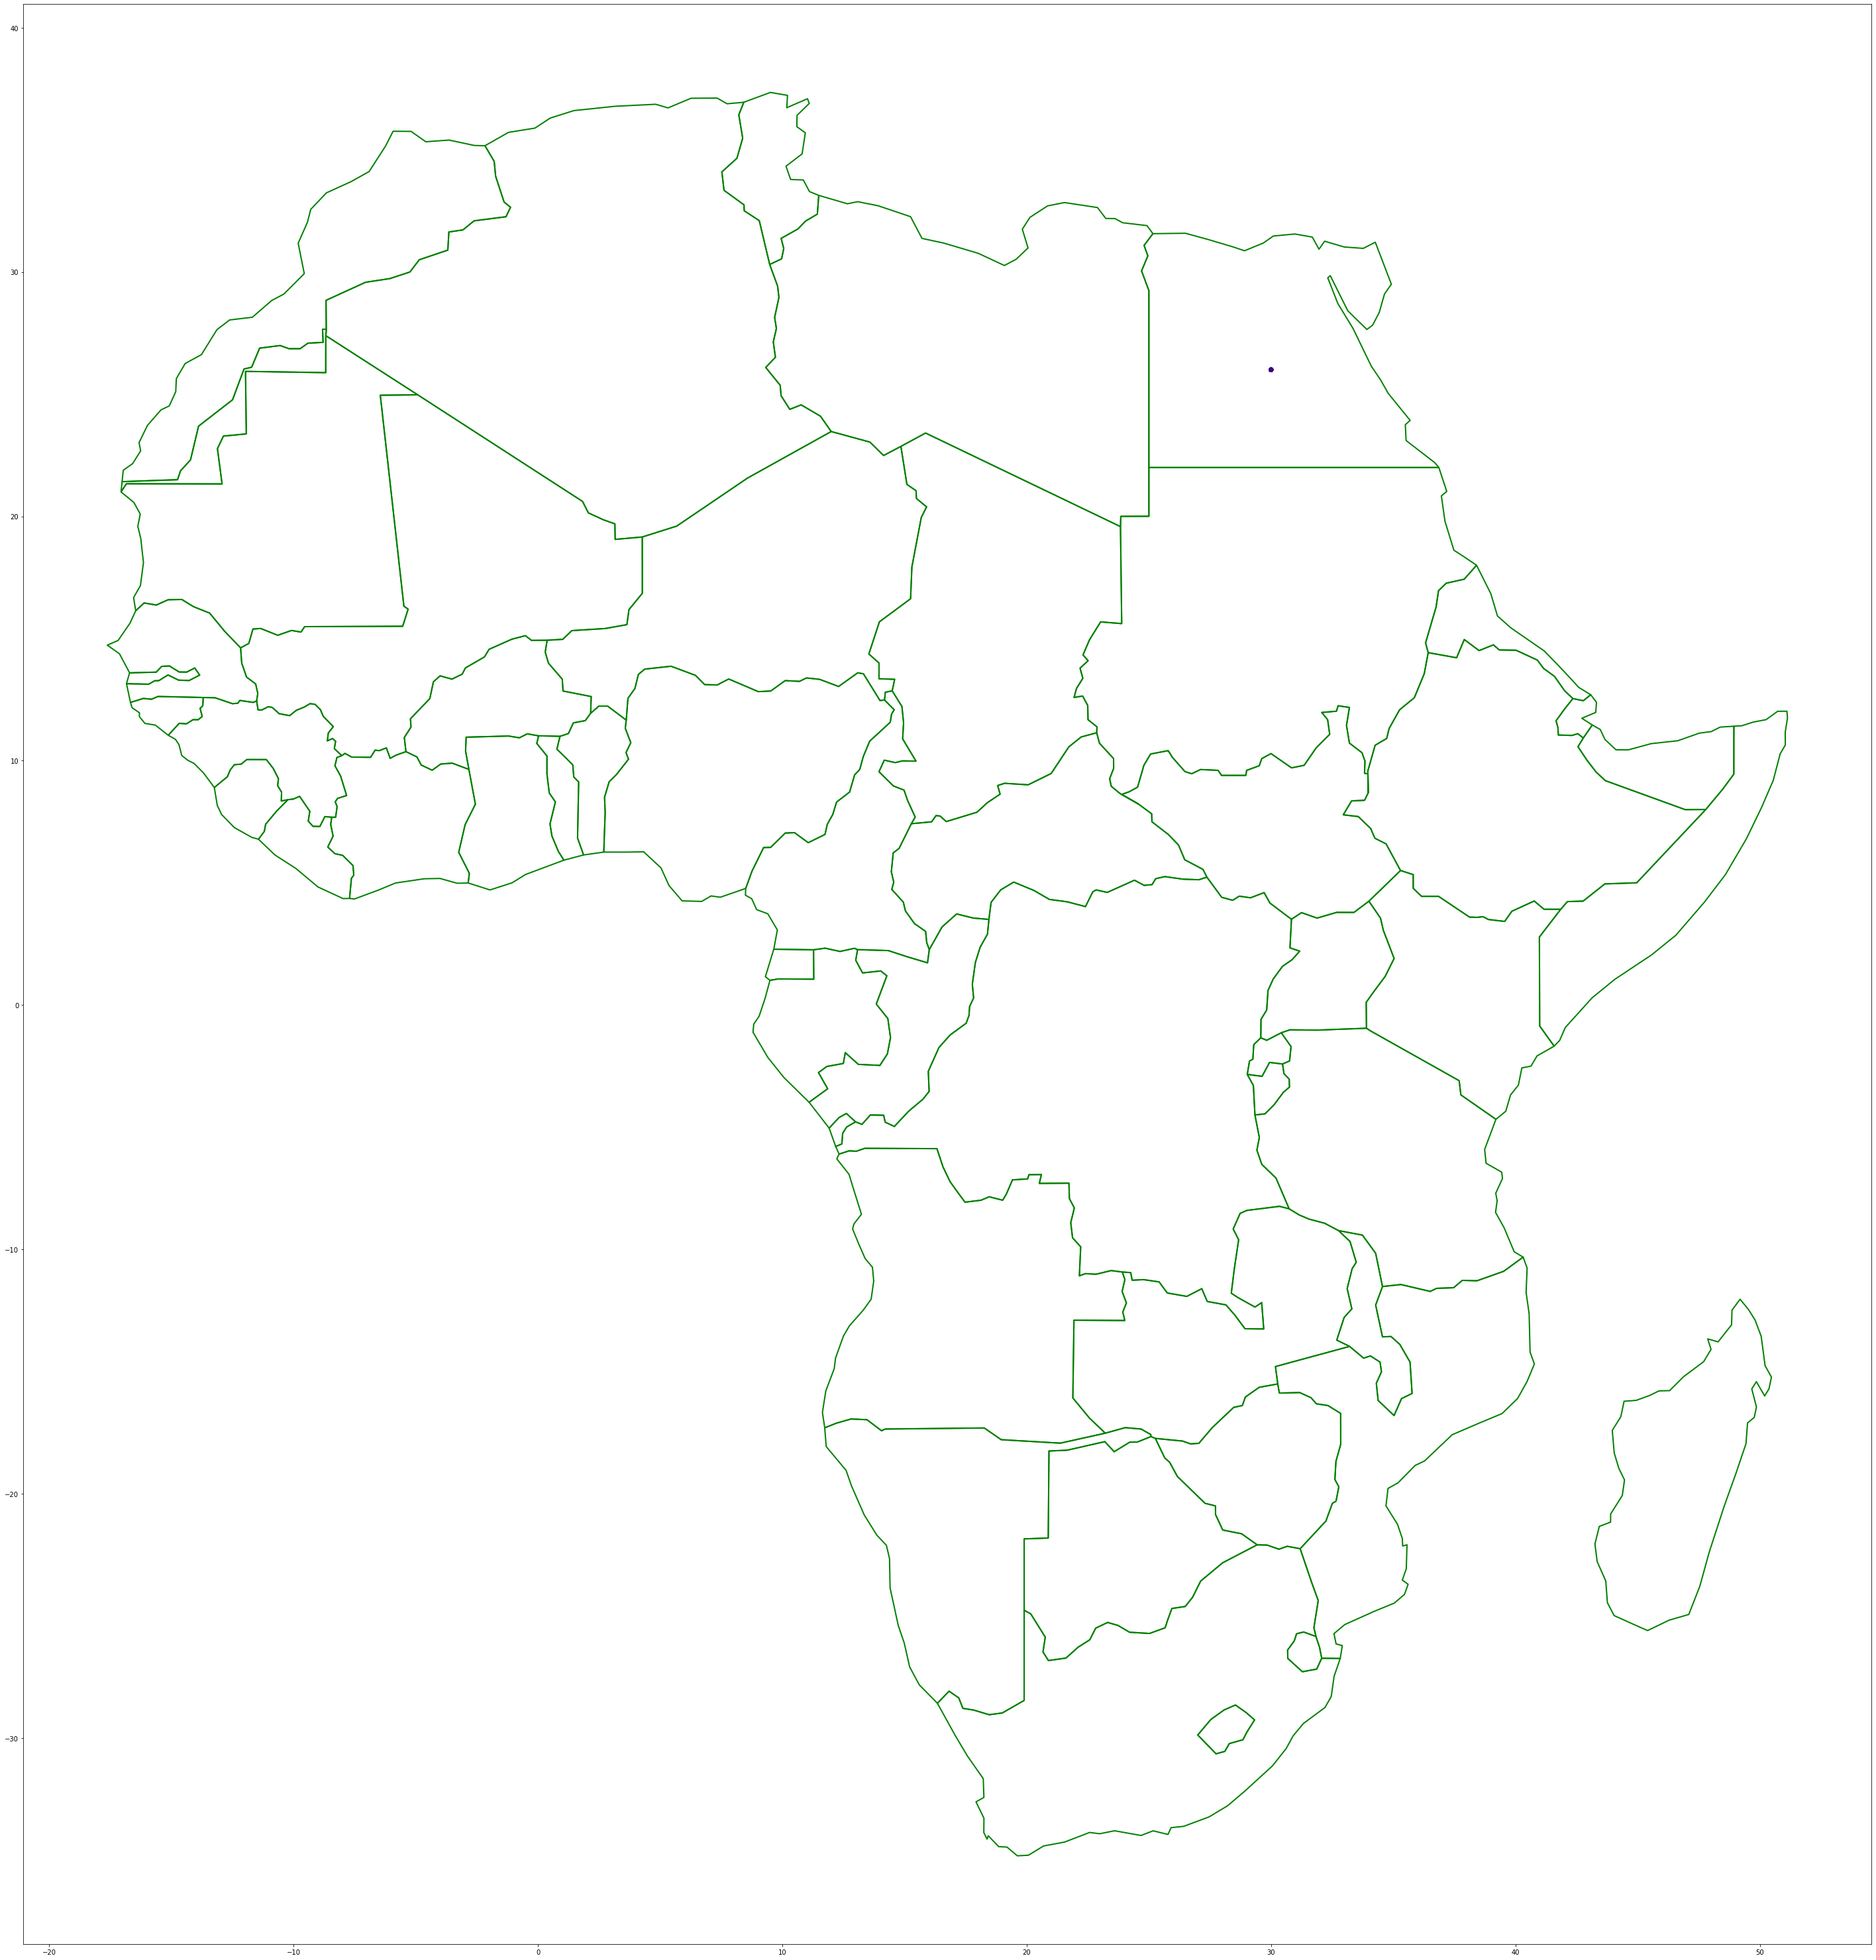

In [314]:
#overlap
fig,ax  = plt.subplots(figsize = (50,300))
gdf1[gdf1['Country Region'] == 'Egypt'].plot(cmap = 'Purples' , ax = ax)
africa.geometry.boundary.plot(color = 'green',edgecolor = 'K',linewidth = 2 , ax =ax)

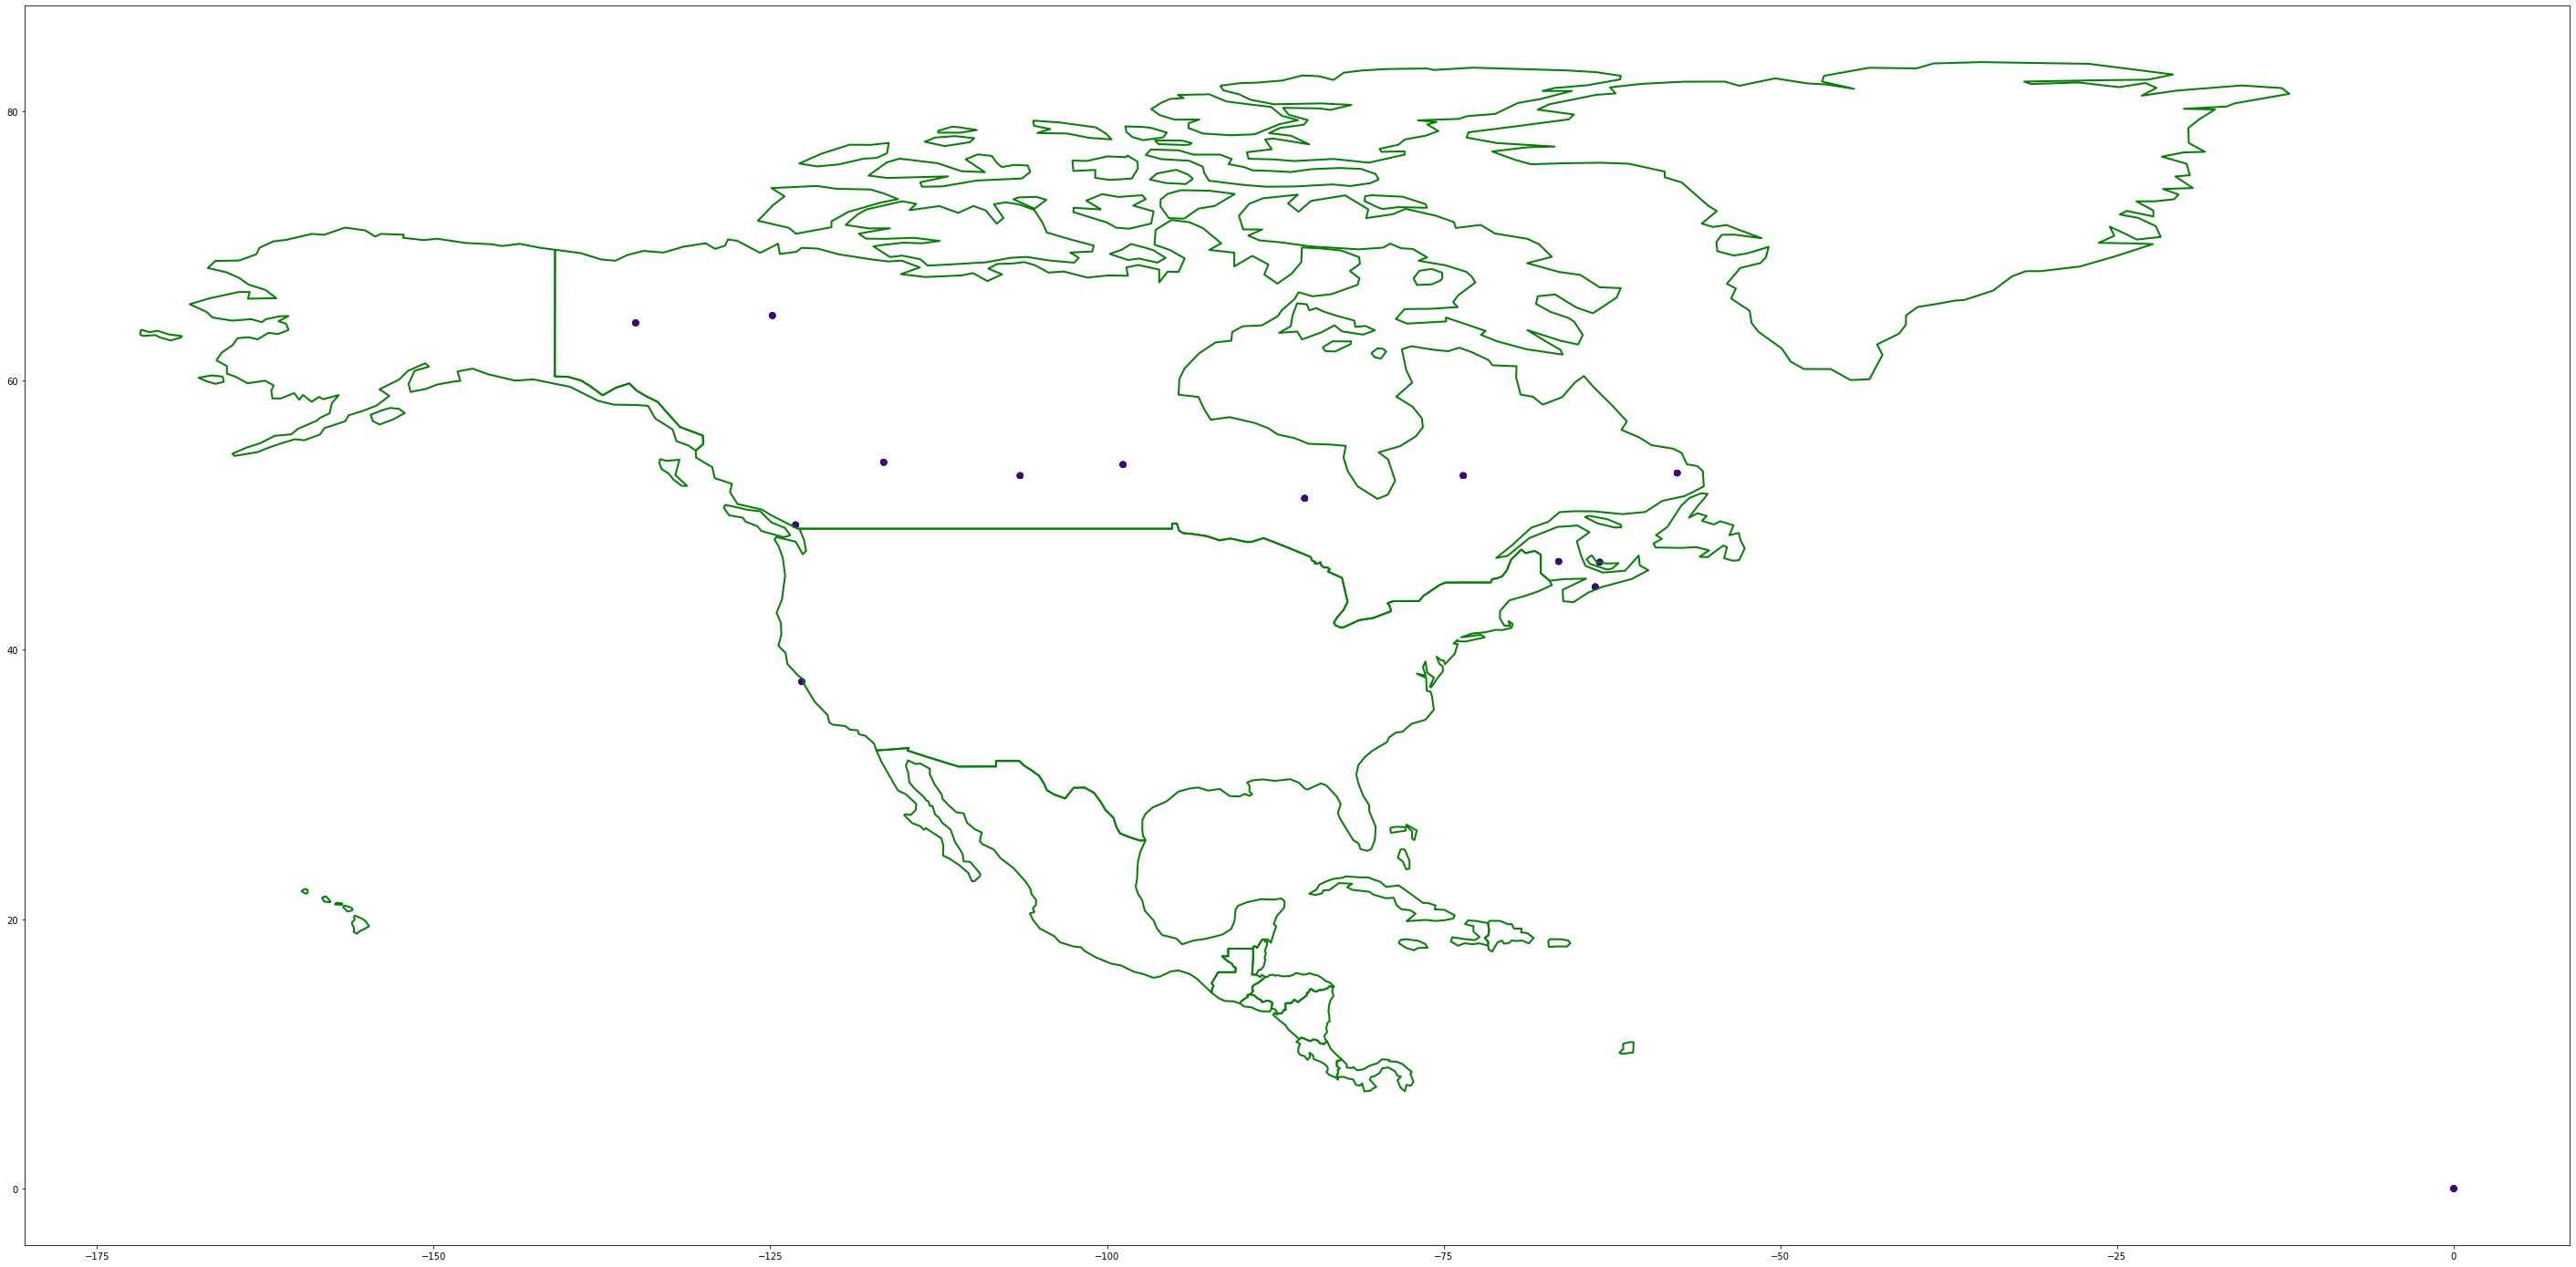

In [298]:
#overlap
fig,ax  = plt.subplots(figsize = (50,300))
gfd1[gfd1['Country Region'] == 'Canada'].plot(cmap = 'Purples' , ax = ax)
north_america.geometry.boundary.plot(color = 'green',edgecolor = 'K',linewidth = 2 , ax =ax)

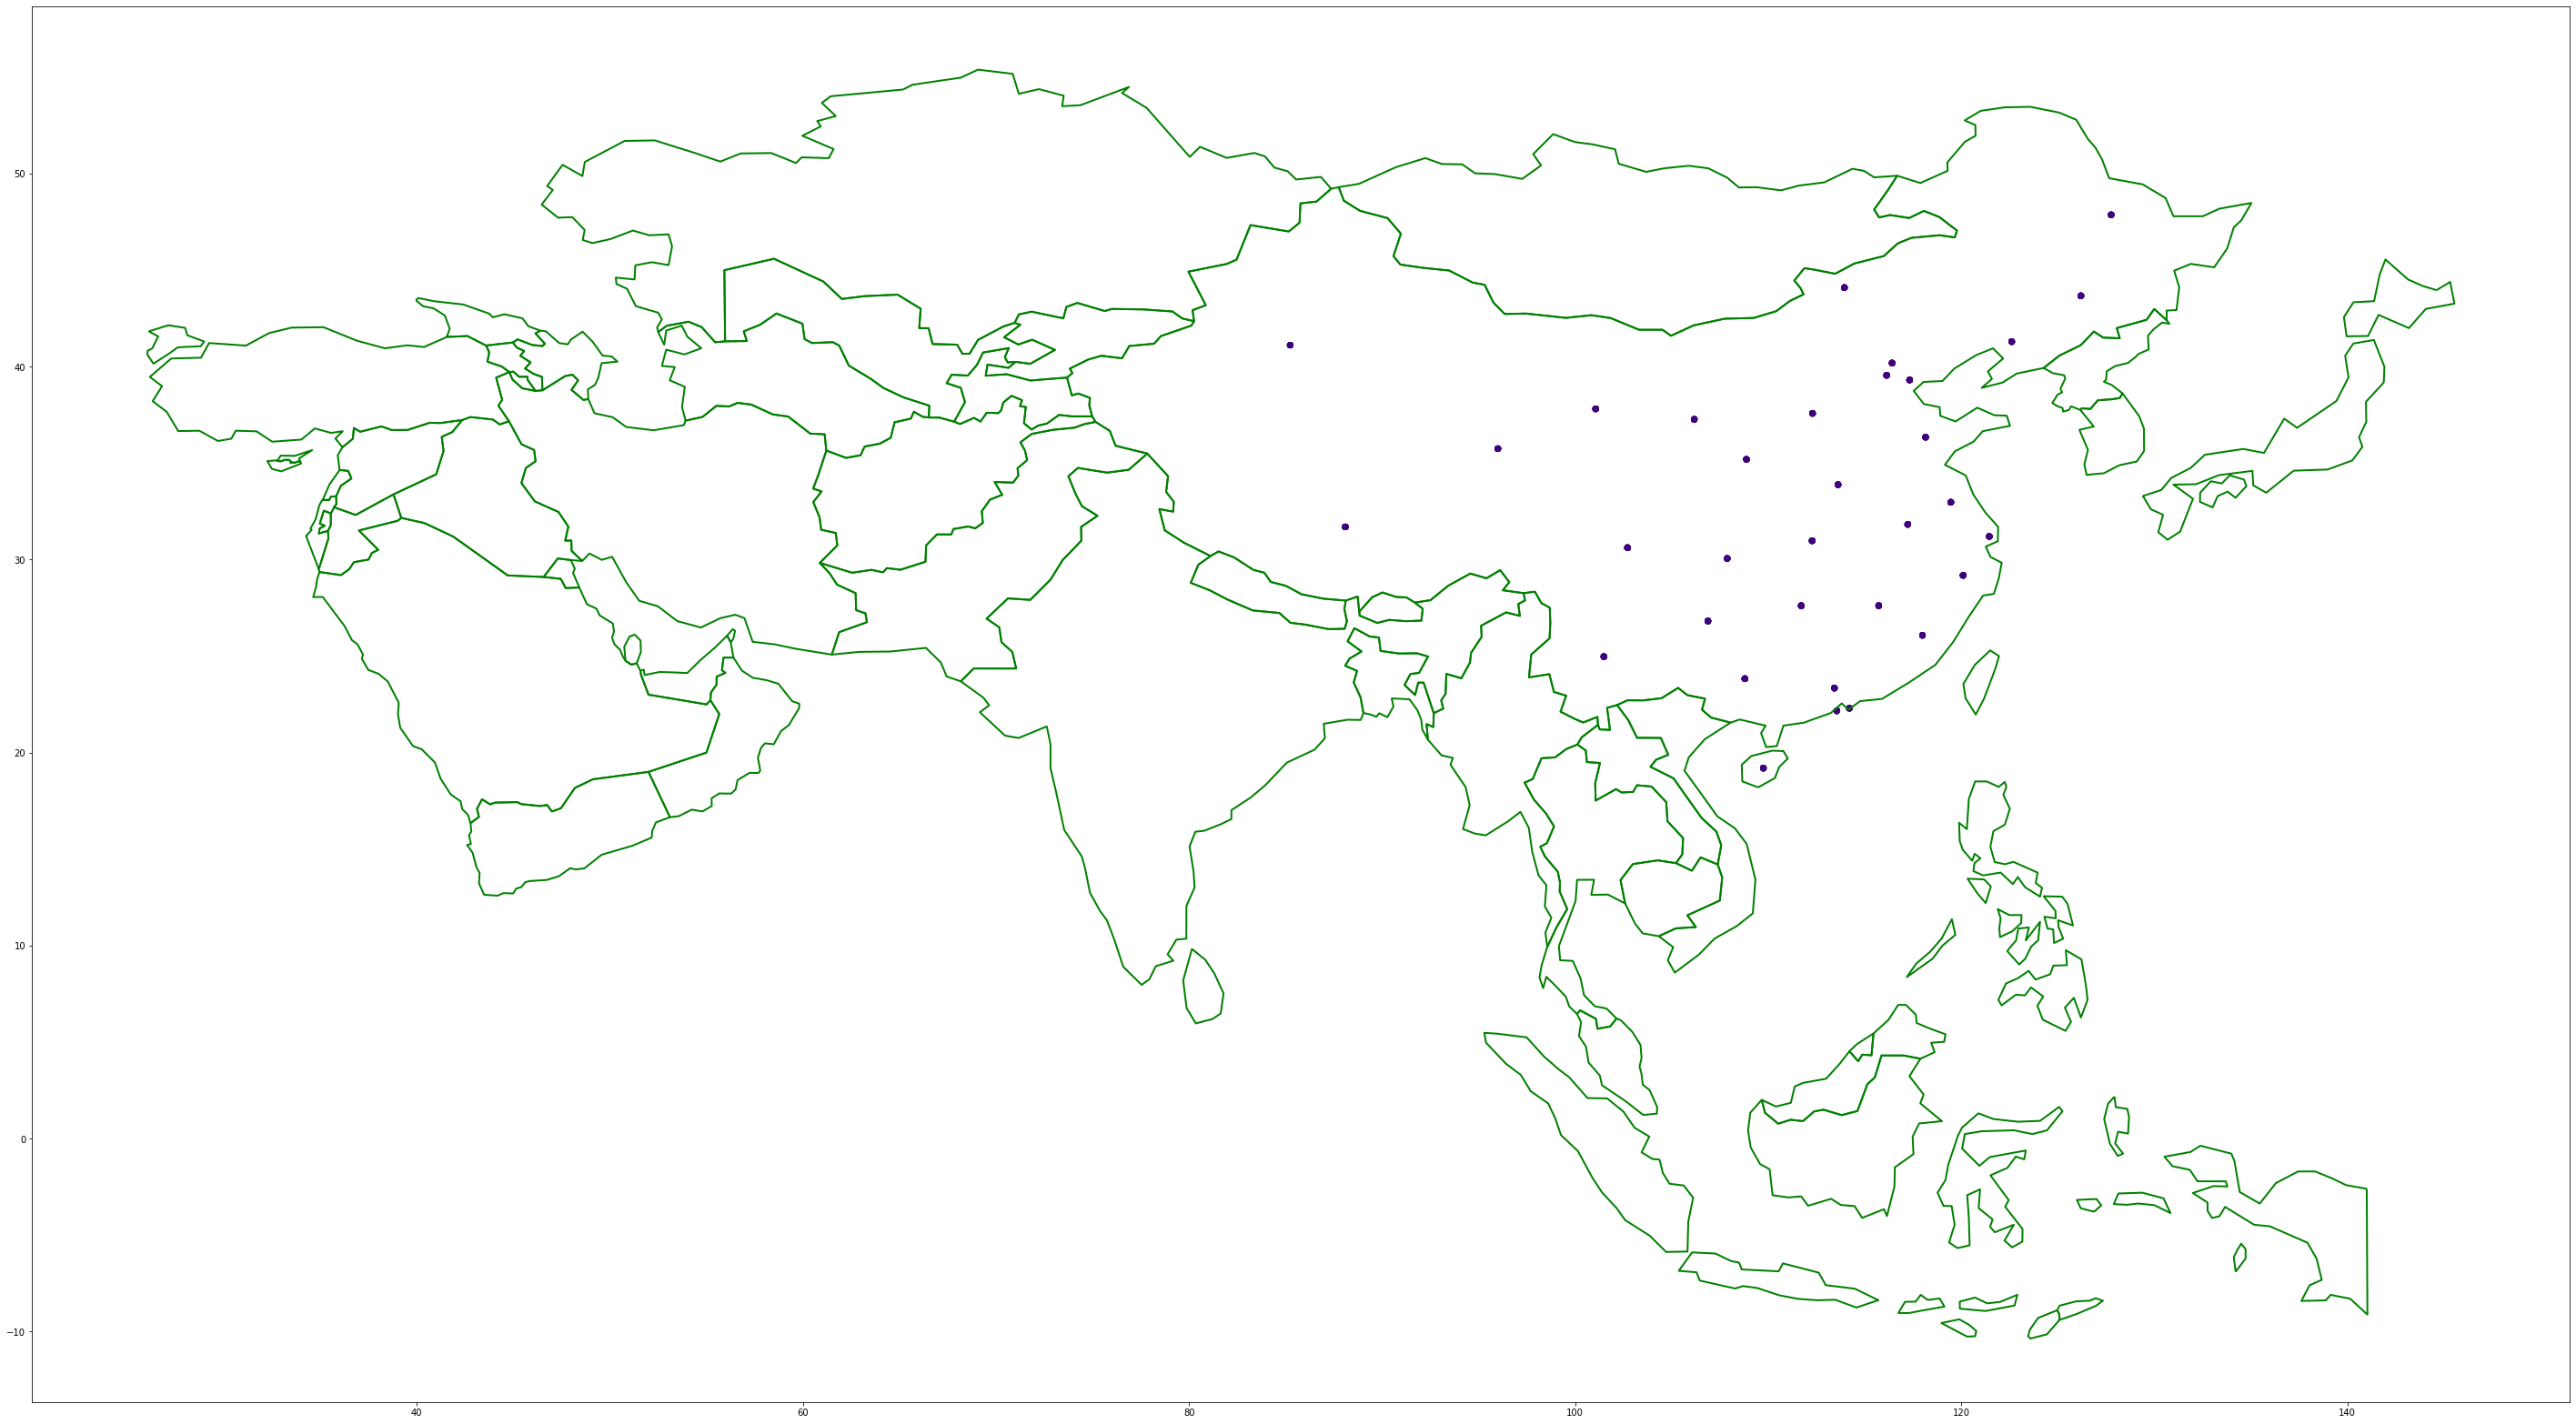

In [316]:
#overlap
fig,ax  = plt.subplots(figsize = (50,300))
gdf1[gdf1['Country Region'] == 'China'].plot(cmap = 'Purples' , ax = ax)
asia.geometry.boundary.plot(color = 'green',edgecolor = 'K',linewidth = 2 , ax =ax)

In [317]:
#time series analysis
df.head()

,Province State,Country Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)


In [333]:
df_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28.0
1/23/20,444,17,28.0
1/24/20,549,24,31.0
1/25/20,761,40,42.0
1/26/20,1058,52,45.0
...,...,...,...
3/7/20,67666,2959,47743.0
3/8/20,67707,2986,49134.0
3/9/20,67743,3008,50318.0


In [ ]:
df2 = df

In [319]:
df.to_csv('corona_clean.csv')

In [334]:
import datetime as dt
df['cases_date'] = pd.to_datetime(df2['Date'])
df2.dtypes

Province State            object
Country Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Recovered                float64
Deaths                     int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

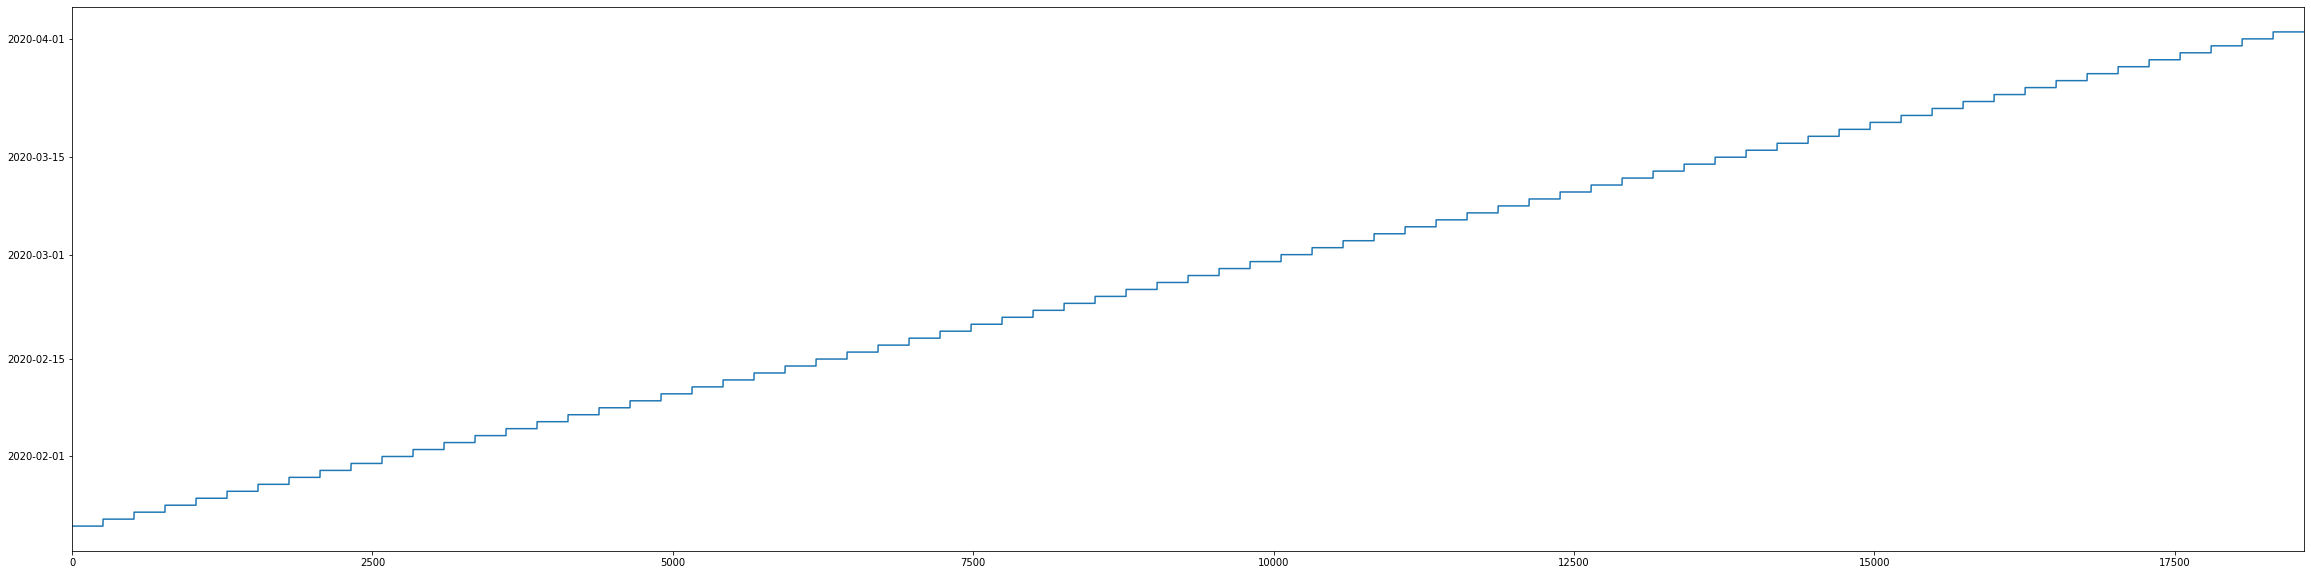

In [354]:
df['cases_date'].plot(figsize=(40,10))

In [339]:
ts = df2.set_index('cases_date')

In [340]:
ts

,Province State,Country Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
cases_date,,,,,,,,,
2020-01-22,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0.0,0,POINT (65.00000 33.00000)
2020-01-22,NaN,Albania,41.153300,20.168300,1/22/20,0,0.0,0,POINT (20.16830 41.15330)
2020-01-22,NaN,Algeria,28.033900,1.659600,1/22/20,0,0.0,0,POINT (1.65960 28.03390)
2020-01-22,NaN,Andorra,42.506300,1.521800,1/22/20,0,0.0,0,POINT (1.52180 42.50630)
2020-01-22,NaN,Angola,-11.202700,17.873900,1/22/20,0,0.0,0,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...
2020-04-02,NaN,Botswana,-22.328500,24.684900,4/2/20,4,NaN,1,POINT (24.68490 -22.32850)
2020-04-02,NaN,Burundi,-3.373100,29.918900,4/2/20,3,NaN,0,POINT (29.91890 -3.37310)
2020-04-02,NaN,Sierra Leone,8.460555,-11.779889,4/2/20,2,NaN,0,POINT (-11.77989 8.46056)


In [346]:
df_per_date = ts.groupby(['cases_date']).sum().reset_index(drop = None)

In [347]:
df_per_date

,cases_date,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,5585.85353,5894.724092,555,28.0,17
1,2020-01-23,5585.85353,5894.724092,654,30.0,18
2,2020-01-24,5585.85353,5894.724092,941,38.0,26
3,2020-01-25,5585.85353,5894.724092,1434,83.0,42
4,2020-01-26,5585.85353,5894.724092,2118,63.0,56
...,...,...,...,...,...,...
67,2020-03-29,5585.85353,5894.724092,720117,210654.0,33925
68,2020-03-30,5585.85353,5894.724092,782365,9415.0,37582
69,2020-03-31,5585.85353,5894.724092,857487,0.0,42107
70,2020-04-01,5585.85353,5894.724092,932605,0.0,46809


In [348]:
df_per_date.columns

Index(['cases_date', 'Lat', 'Long', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

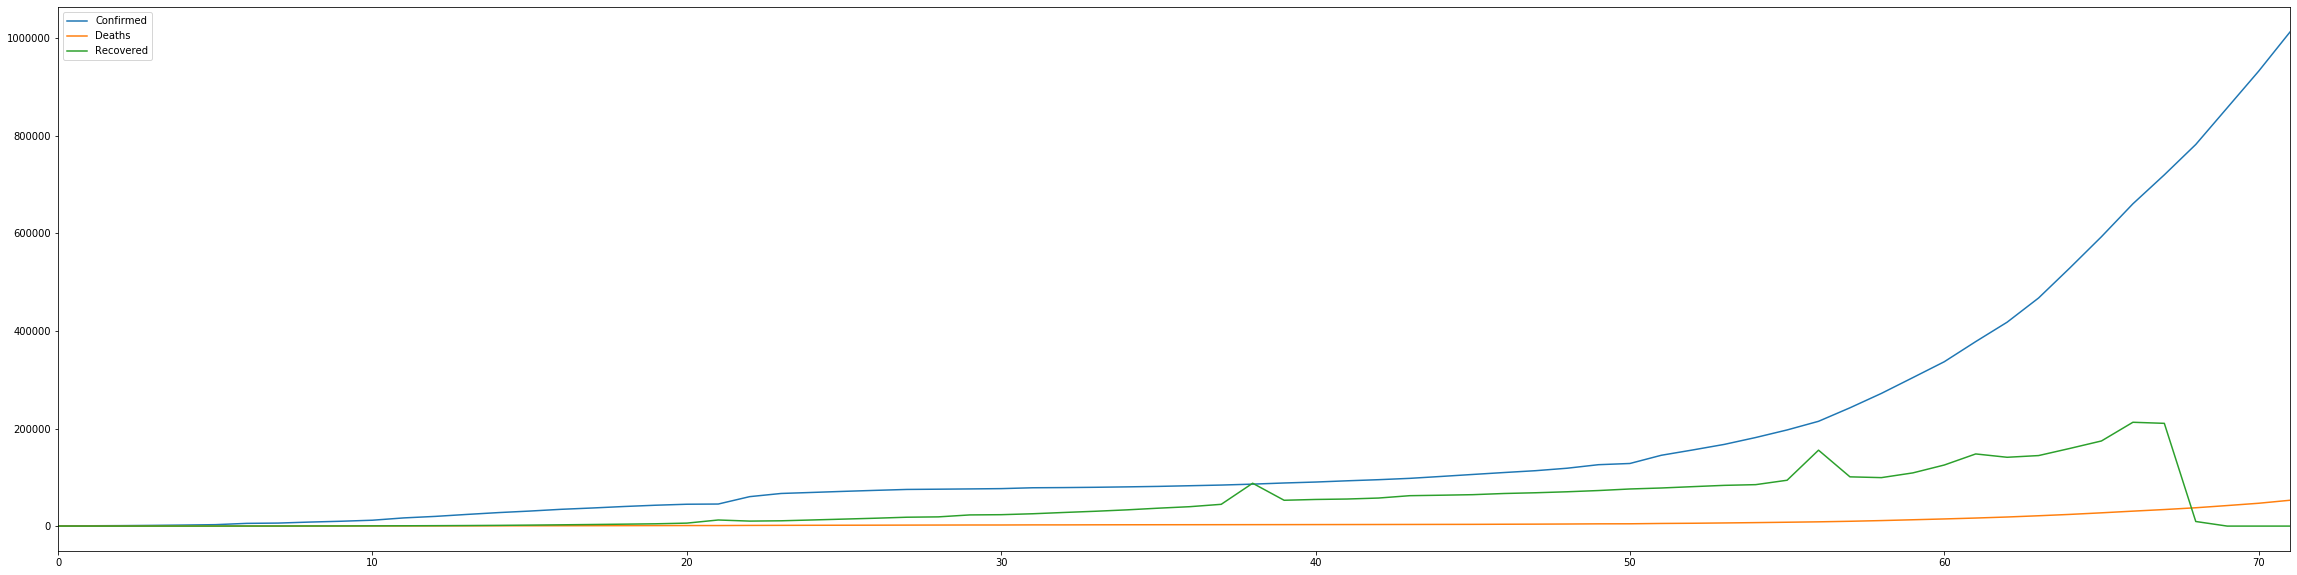

In [353]:
df_per_date[['Confirmed','Deaths','Recovered']].plot(kind= 'line' , figsize = (40 , 10))